# This is a Linear Regression Model for Predicting the Prices of Used Cars, Given Some of Their Features.

## Importing the relevant libraries

In [1]:
# For this exercise, we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set() # This is done so that all plots will be visualised using the seaborn library by default.
          # The seaborn library produces nicer looking plots than the matplotlib library.

## Loading the raw data

In [2]:
# We will now load the data from the .csv file in the project folder and store it in a data frame called raw_data.
raw_data = pd.read_csv("/Users/GoriPNEUMA/Documents/DataSpell Files/My Portfolio/Linear Regression/Predicting the Prices of Used Cars "
                       "Given Some Features of the Cars/0. Used Cars' Data.csv")

# We will explore the top 10 rows of the data frame to see what our data looks like.
raw_data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


## Preprocessing

### Let's now do a bit of EDA (Exploratory Data Analysis)

In [3]:
raw_data.describe(include='all') # The "include" argument is added so that available descriptive statistics can also be shown for
                                 # categorical (non-numerical) variables.

# Note that categorical variables/features obviously do not have some types of numerical descriptive values
# (like mean, standard deviation, etc.), while numerical variables also do not have the categorical descriptive values,
# hence the NaN in some cells in the table below.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the features of interest

In [4]:
# Since the descriptive information carried by "Brand" is very similar to that carried by "Model",
# we will create the regression without the "Model" feature to avoid Multi-collinearity issues later on.
data = raw_data.drop(['Model'],axis=1) # Dropping the "Model" feature from the data frame.

# Let's check the new descriptive statistics.
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
# Let's check which feature(s) have missing values and how many of the values are actually missing.
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# As there are a total of 4,345 observations, I have decided to drop the 172 + 150 observations with missing values.
# In a subsequent effort to improve this model, we can explore another way to deal with these missing values
# by replacing them with approximate values that are representative of the whole data set.
# For now however, let's drop the missing values and store the resulting data frame in a variable:
# data_no_mv (data with no missing values).
data_no_mv = data.dropna(axis=0)

In [7]:
# Let's now take another look at the descriptive statistics of the new data frame without the missing values.
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Distribution Functions (PDFs)

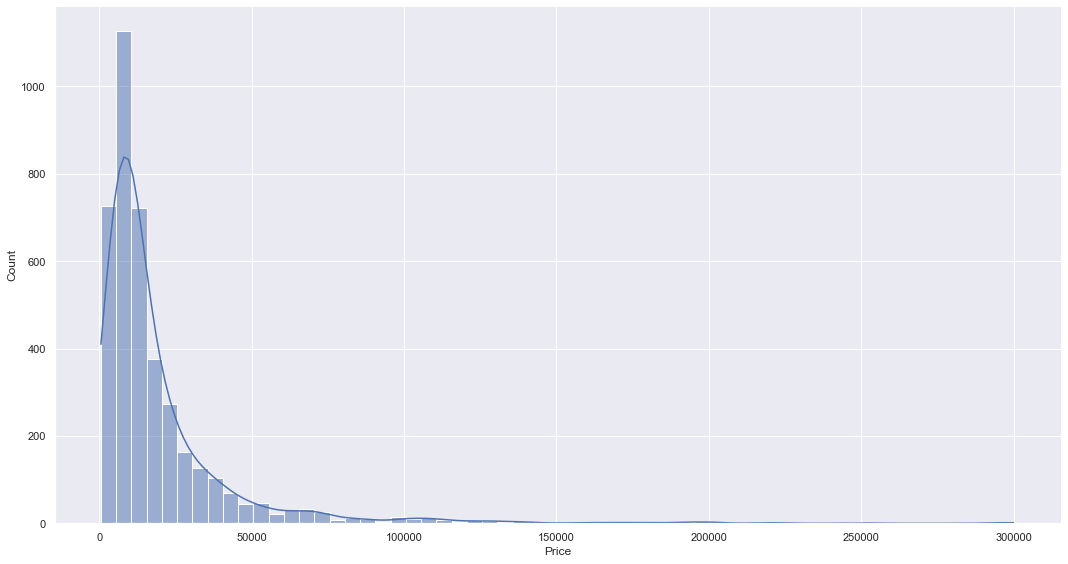

In [8]:
# A great step at this stage is to display the PDFs of the numerical variables.
# The PDF will show us how that variable is distributed.
# This makes it very easy to spot anomalies such as outliers.
# The PDF is often the basis on which we decide whether we want to transform a feature.
# Let's begin with the PDF of the "Price" variable.
sns.displot(data_no_mv['Price'], kde = True, binwidth = 5000, height=8, aspect=15/8)

### Dealing with outliers
##### Note: Having many outliers can be harmful to one's model. One of the major problems of outliers is that they can bring about Heteroscedasticity in one's data (a situation where one has an uneven variance of residuals across observations).

In [9]:
# Obviously there are some outliers present in the "Price" variable.

# Here, the outliers are situated around the higher prices (right side of the graph).
# In this kind of situation, logic and domain knowledge come handy.
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price.
# What we will now do is remove 1% of the "Price" values on the high end to get rid of the unrealistically high prices of the used cars.

# Let's declare a variable that will be equal to the 99th percentile of the "Price" variable.
q = data_no_mv["Price"].quantile(0.99)

# We will now create a new data frame with the condition that all prices must be below the 99th percentile of "Price".
data_1 = data_no_mv[data_no_mv["Price"]<q]

# In this way, we have essentially removed the top 1% of the data about "Price". Let's see the new descriptive statistics.
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


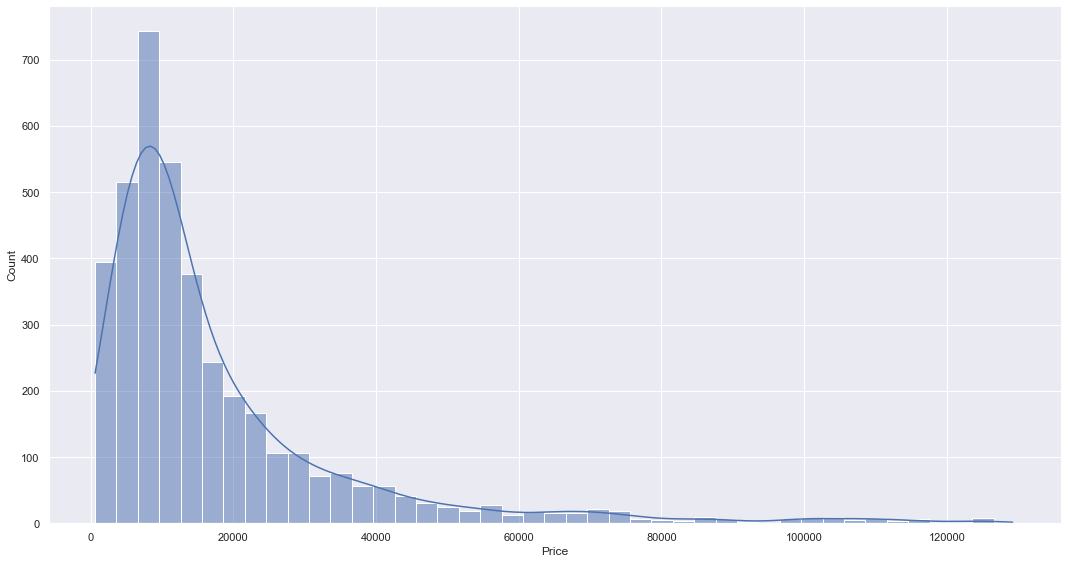

In [10]:
# Let's check the PDF of "Price" once again to ensure that the result is still distributed in the same way overall
# and that there are much fewer outliers.
sns.displot(data_1['Price'], kde = True, binwidth = 3000, height=8, aspect=15/8)

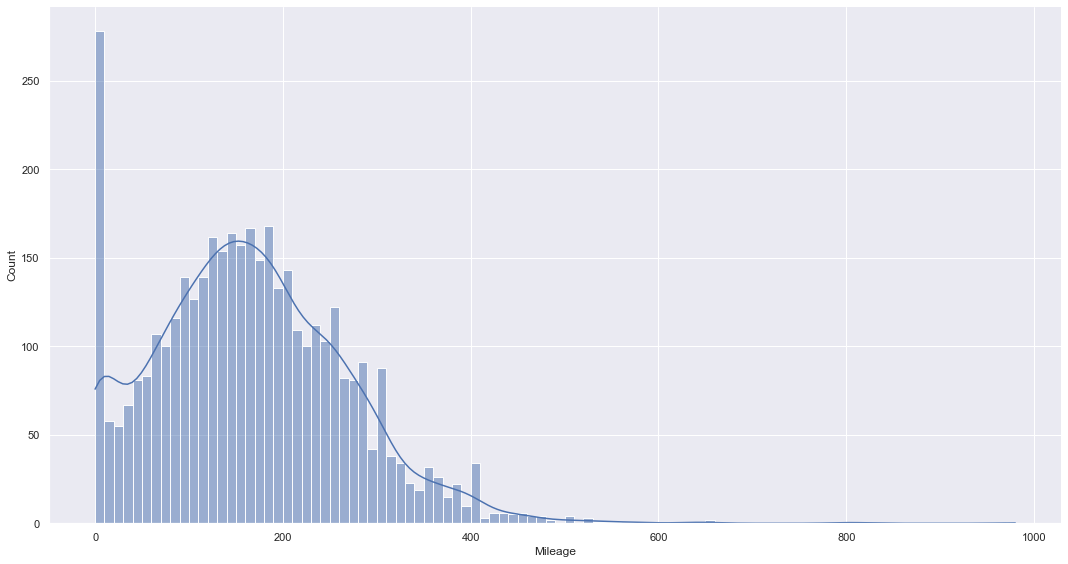

In [11]:
# We can treat the other numerical variables in a similar way as we did for "Price".
# Although, we may decide to handle these differently when trying to improve our model.
sns.displot(data_1['Mileage'], kde = True, binwidth = 10, height=8, aspect=15/8)

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q] # We have now removed the top 1% of "Mileage" values to reduce the amount of outliers here.

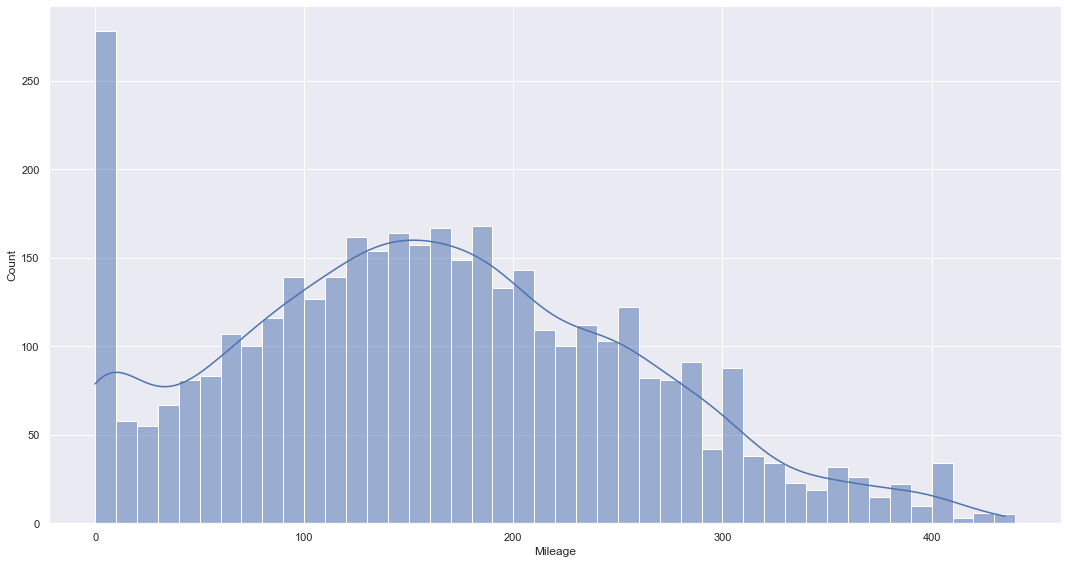

In [13]:
# Fun fact: The following PDF plot for "Mileage" looks kind of normal, doesn't it?
sns.displot(data_2['Mileage'], kde = True, binwidth = 10, height=8, aspect=15/8)

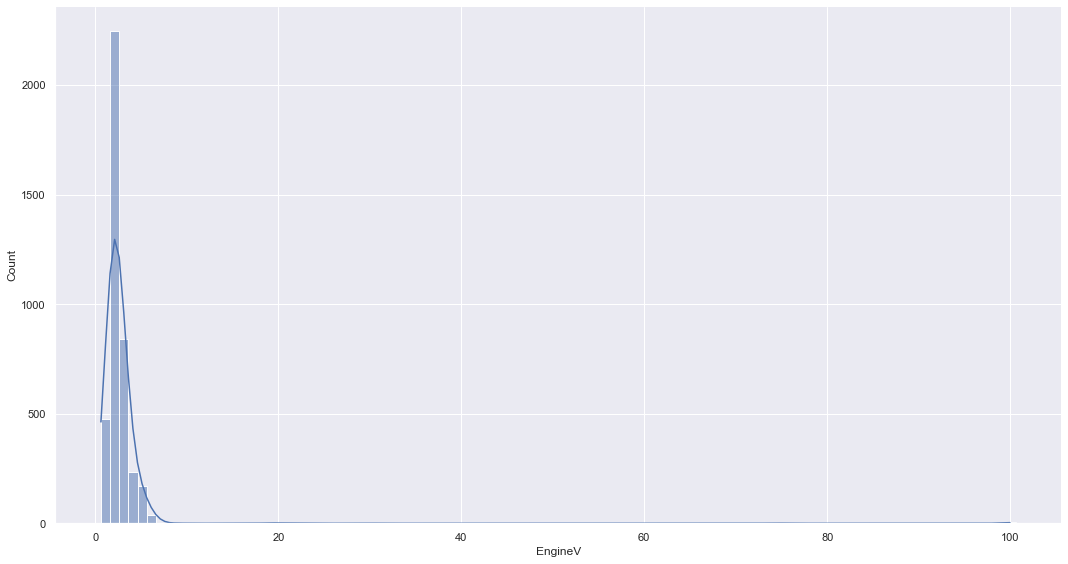

In [14]:
# Now we move on to "EngineV" (Engine Volume).
# The situation with Engine Volume is very strange from its PDF plot below.
# We see that there are values as high as 100. This is another situation where domain knowledge comes to play.
# I know for a fact that there are no commercially produced cars with engine volumes reaching 100-litre capacity.
sns.displot(data_no_mv['EngineV'], kde = True, binwidth = 1, height=8, aspect=15/8)

In [15]:
# A simple Google search can indicate the natural domain of this variable.
# Car engine volumes are mostly around 6.5l and below (maybe a few high performance sports cars could go a little higher).
# We will now create a new data frame (data_3) containing only the cars that have engine volumes less than 6.5l.
data_3 = data_2[data_2['EngineV']<6.5]

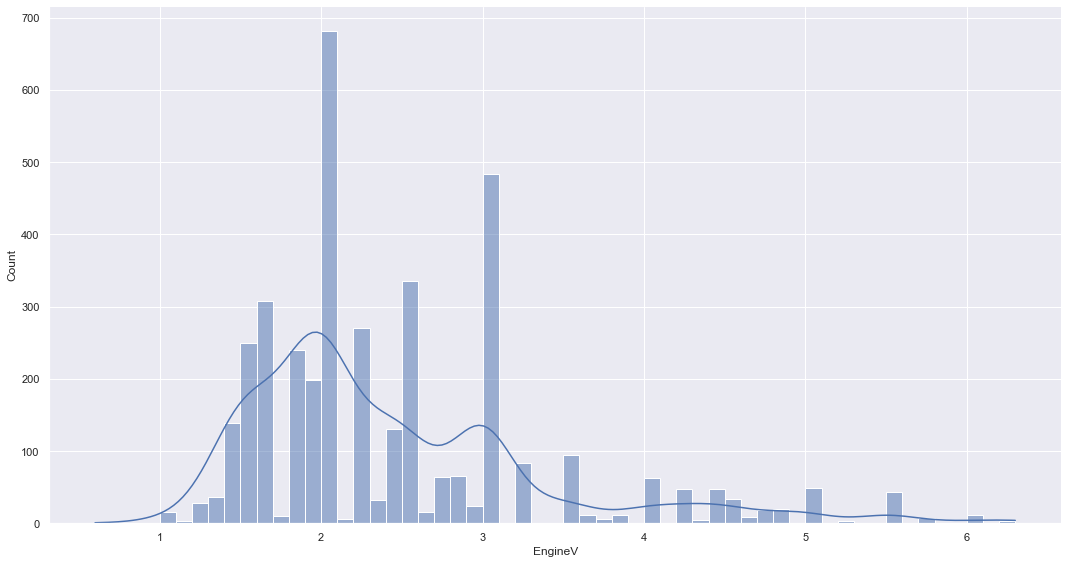

In [16]:
# Let's see the new PDF for "EngineV".
sns.displot(data_3['EngineV'], kde = True, binwidth = 0.1, height=8, aspect=15/8)

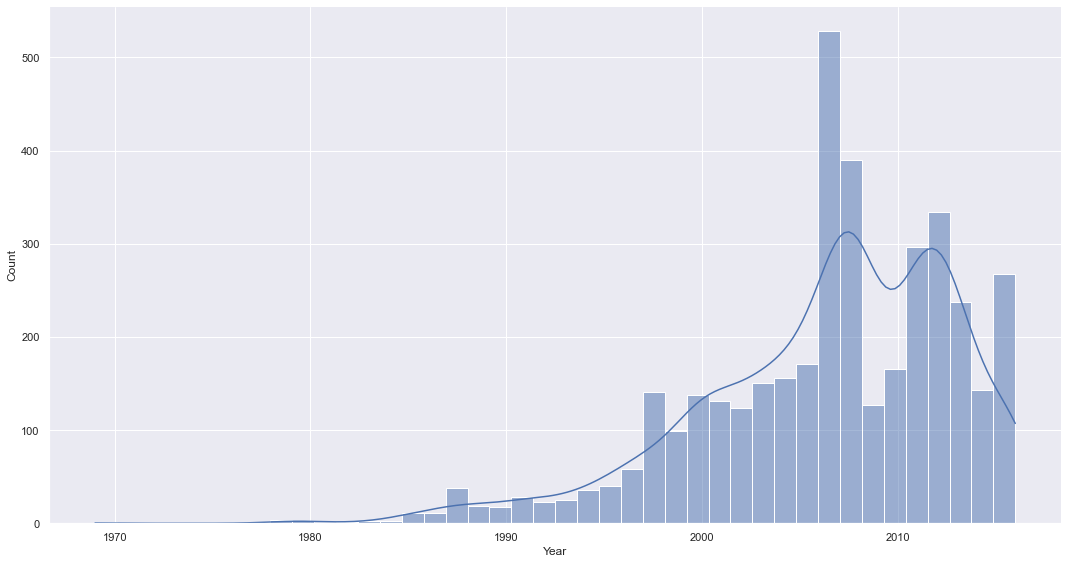

In [17]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'. However, the outliers are on the low end.
sns.displot(data_3['Year'], kde = True, height=8, aspect=15/8)

In [18]:
# Let's remove the bottom 1% of the cars (in other words, we are removing the very oldest of the cars) which make up the outliers.
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

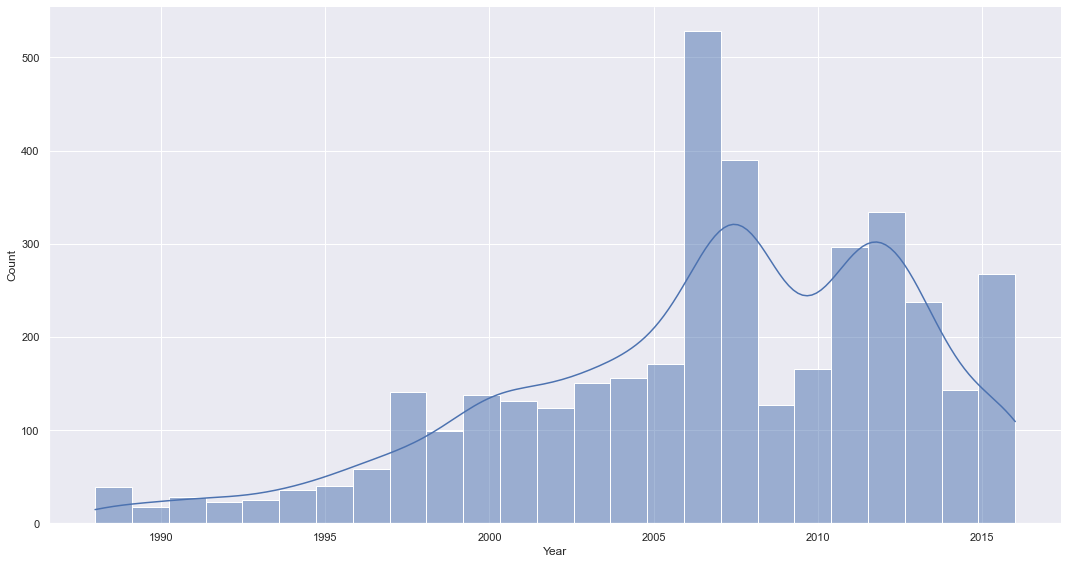

In [19]:
# Here's the new PDF plot for "Year".
sns.displot(data_4['Year'], kde = True, height=8, aspect=15/8)

In [20]:
# Let's now resset our data frame's indexing after all the observations we have removed.
data_cleaned = data_4.reset_index(drop=True) # The "drop=True" is added to remove the column of old indexing
                                             # usually added by default after resetting the indexing.

### Let's now see the descriptive statistics for our final, cleaned data set.
##### Yes, we have removed about 11% overall of the original data set. However, I believe we are still left with a substantial amount of the original data - 3,867 observations!

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the Linear Regression (with Ordinary Least Squares - OLS) assumptions

### 1. Confirmation of Linearity
##### There must be a linear or near-linear relationship between the dependent variable (target) and each of the
##### independent variables (features).

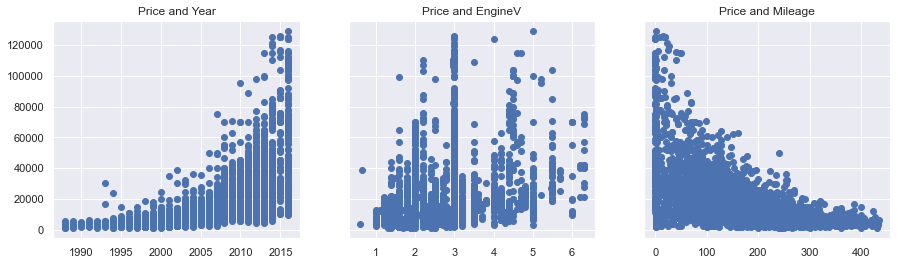

In [22]:
# Our target variable is "Price" while other variables are the features.
# Since Price is the 'y' axis of all the plots, we will plot them side-by-side (so we can compare them).
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey="all", figsize =(15,4)) # sharey => share "Price" as y
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

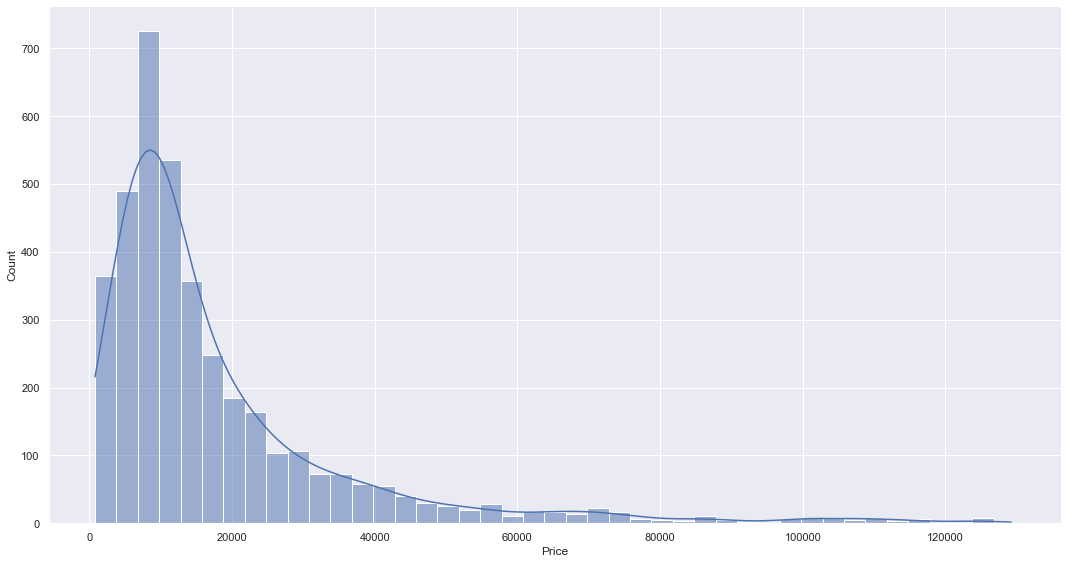

In [23]:
# From the subplots above and the PDF of "Price", we can easily determine that our target ("Price") is exponentially distributed.
# A good transformation in this case is a log transformation.
sns.displot(data_cleaned["Price"], kde = True, binwidth = 3000, height=8, aspect=15/8) # Current PDF for "Price" seen below.

#### Relaxing the assumptions
##### Executing transformation to satisfy Linearity assumption.

In [24]:
# Let's do a log transformation on "Price".
log_price = np.log(data_cleaned["Price"])

# Then we add it to our cleaned data frame.
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


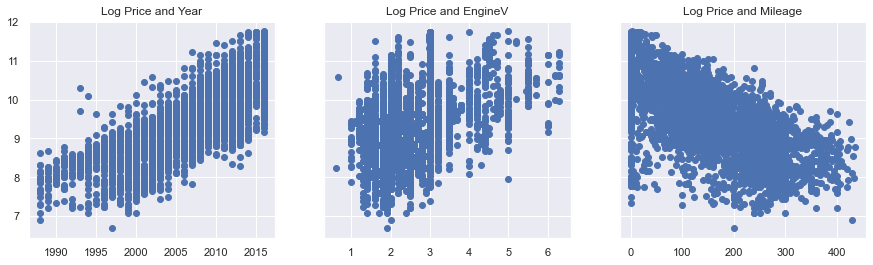

In [25]:
# Let's now check the three scatter plots once again (after the log transformation done to "Price").
# Note that we will now use "log_price" instead of "Price".
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey="all", figsize =(15,4))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned["log_price"])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax3.set_title("Log Price and Mileage")


plt.show()

# We now see on the plots below that the relationships (between each numerical feature and the target)
# show a linear or near linear relationship.
# This is some good linear regression material.

# Alternatively, we could have transformed each of the features.

In [26]:
# Since we will now be using the "log_price" variable, we can drop the old "Price" variable.
data_cleaned = data_cleaned.drop(["Price"],axis=1)

### 2. Confirmation of No Multi-collinearity
##### No feature/predictor should be perfectly (or almost perfectly) explained by the other predictors.
[Note: I have been using the following terms interchangeably: "feature", "independent variable", "predictor" (these all
mean the same thing). Also, "dependent variable" and "target" mean the same thing and can be used interchangeably too.]

In [27]:
### Let's take a quick look at our updated data set.
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


#### To check for multi-collinearity among features, we must find the features' Variance Inflation Factors (VIFs). The cell below shows the correct way to find VIF for regressions that already have a constant. We will know if this one has a constant from the results we get from the VIF data frame.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we will declare a data frame variable where we put all features
# which we want to check for multi-collinearity.
# Since our categorical variables are not yet pre-processed, we will only take the numerical variables.
variables_0 = data_cleaned[['Mileage','Year','EngineV']]

# We create a new data frame which will include all the VIFs.
# Note that each variable has its own variance inflation factor as this measure is variable specific (not model specific).
vif_0 = pd.DataFrame()

# Here we make use of the variance_inflation_factor, which will basically output the respective VIFs.
vif_0["VIF"] = [variance_inflation_factor(variables_0.values, i) for i in range(variables_0.shape[1])]

# Finally, I like to include names so it is easier to explore the result.
vif_0["Features"] = variables_0.columns

In [29]:
# Let's explore the result
vif_0

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


#### From the above VIF data frame, we know that this regression does not already have a constant because if it did, an additional VIF value will appear in the data frame for "const" (constant). As such, we must add a constant before finding the actual VIFs.

#### The next cell shows the "proper" way to find VIFs for a regression that doesn't already have a constant i.e. 0 constant (notice the fourth line of code below which adds a constant).

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = data_cleaned[['Mileage','Year','EngineV']]
variables = add_constant(variables)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,223226.766869,const
1,2.048411,Mileage
2,2.049176,Year
3,1.000562,EngineV


#### The method above shows that there is negligible multi-collinearity among the numerical predictors (as their respective VIFs are below 5.0). We can also see the additional VIF value for "const" (constant) which we were missing previously. We can confirm that the results above are accurate by using the R programming language to find the VIFs (which is more straightforward than here in Python). We should also note that the VIF value for the constant is irrelevant to our model, however, it is important that it appears in the VIF results.


### 3. Confirmation of No Endogeneity
#### No correlation between the residuals and features

In [31]:
data_cleaned.head() # Another peak at our updated data set.

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


#### We want to find the residuals and confirm there is no correlation between them and the features. One way to do this (among others) is to first run the linear regression on our data using the statsmodels library.

In [32]:
y = data_cleaned["log_price"]
x1 = data_cleaned[["Mileage", "EngineV", "Year"]]

In [33]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3912.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:17:15   Log-Likelihood:                -2278.7
No. Observations:                3867   AIC:                             4565.
Df Residuals:                    3863   BIC:                             4591.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -176.6204      3.316    -53.266      0.000    -183.121    -170.119
Mileage       -0.0014      0.000    -13.724      0.000      -0.002      -0.001
EngineV        0.3932      0.007     53.162      0.000       0.379       0.408
Year           0.0923      0.002     56.097      0.000       0.089       0.096
==============================================================================
Omnibus:                       28.313   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.120
Skew:                          -0.194   Prob(JB):                     4.75e-07
Kurtosis:                       3.173   Cond. No.                     9.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
residuals = results.resid # We are now finding the residuals with this line of code.

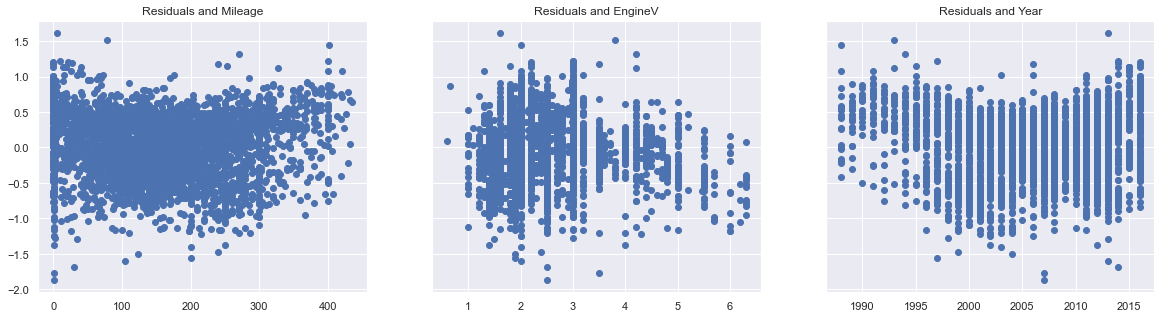

In [36]:
# We will now do a scatter plot of the residuals against each feature,
# to confirm there is no correlation between them.
fig, (bx1, bx2, bx3) = plt.subplots(1, 3, sharey="all", figsize =(20,5))
bx1.scatter(data_cleaned["Mileage"], residuals)
bx1.set_title("Residuals and Mileage")
bx2.scatter(data_cleaned["EngineV"], residuals)
bx2.set_title("Residuals and EngineV")
bx3.scatter(data_cleaned["Year"], residuals)
bx3.set_title("Residuals and Year")

plt.show()

#### The three scatter plots above show that there is no correlation between the independent variables (features) and the Error Term (Residuals). Therefore, this data supports the linear regression assumption of "No Endogeneity".

### 4. Confirmation of Normality of Error Term (Residuals)
#### Error Term (Residuals) should follow a normal or nearly normal distribution

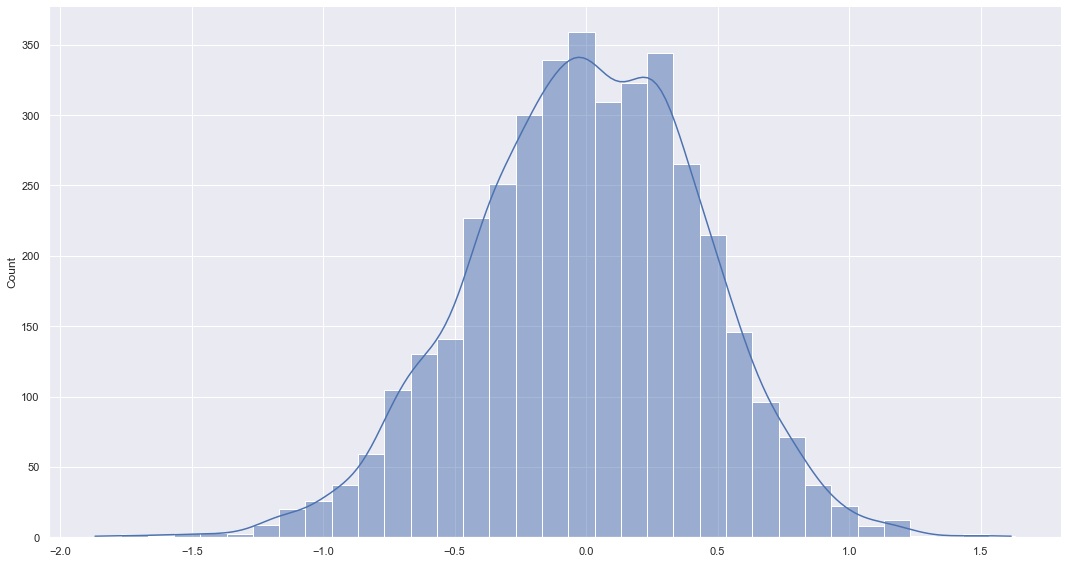

In [37]:
sns.displot(residuals, kde = True, binwidth = 0.1, height=8, aspect=15/8) # A PDF plot of the residuals

#### The PDF plot (above) of the residuals show that they are normally distributed.

### 5. Confirmation of Homoscedasticity
#### Variance of Residuals should be constant/nearly constant across observations.

In [38]:
# What we do here is a scatter plot of the residuals against the target with a horizontal line through the origin.
# What we do not want to see is a funnel or cone shape, where the distance of points from the horizontal line
# steadily increase as we move from the left side to the right side of the plot.
# This means that the variance of the residuals is not constant or nearly constant across observations.
# See the image below as an example of heteroscedasticity (which means "no homoscedasticity")
# If the image below does not display, you may visit the following article link to see it. Cheers!
# http://www.econometricsbysimulation.com/2012/11/modeling-heteroskedasticity.html

<img height="291" src="/Users/GoriPNEUMA/Documents/DataSpell Files/My Portfolio/Linear Regression/Predicting the Prices of Used Cars Given Some Features of the Cars/heteroskedasticity_modelling.jpg" title="Heteroscedasticity" width="400"/>

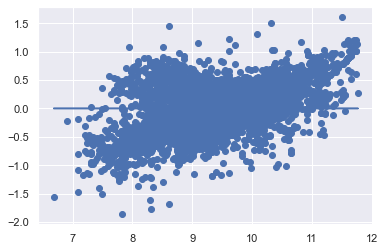

In [39]:
plt.scatter(y, residuals) # Scatter plot of residuals and target.
plt.plot(y, [0]*len(y)) # Horizontal line plot.

#### We can see in the plot above that there is no steady increase in the distance between points and the horizontal line as we move from left to right. There is no funnel/cone shaped plot, therefore we can confirm there is homoscedasticity (or no heteroscedasticity) in our data.

### 6. Confirmation of No Autocorrelation
#### No identifiable relationship between residuals.

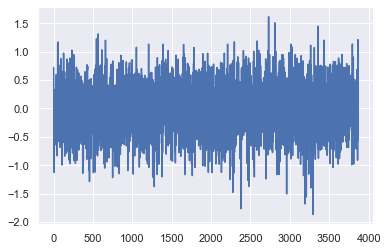

In [40]:
# A way to check this is to do a "time-series" kind of plot of the residuals.
# There should be quick changes in the directions (positive and negative) of consecutive residual values,
# not a cluster of residuals that move in the same direction (either positive or negative).
# The plot below confirms this.

plt.plot(residuals.index, residuals)

## All Linear Regression assumptions have now been verified/confirmed. We can now move ahead by dealing with the categorical (non-numerical variables).

## Create dummy variables

In [41]:
# To include the categorical data in the regression, let's create dummies.
# Do not forget to drop one of the dummies (in each category), or else we will introduce (perfect or near
# perfect) multi-collinearity. We do not want that.

data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True) # We are just dropping the first dummy
                                                                  # in each categorical variable.

# Something we can do when we try to improve our model subsequently is to first find the dummy with
# the most observations, then drop it (i.e. use it as our reference dummy).

In [42]:
# Here's a summary (first 5 observations) of the result.
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Slight Detour:
#### 1. Let's check the VIFs of the features (including the dummies).
#### 2. Let's check the VIFs of the features where we have not dropped one of the dummies as we should have.

In [43]:
# Checking VIFs of features including dummies.
data_with_dummies2 = data_with_dummies.drop(["log_price"], axis=1) # Remember "log_price" is now our target,
                                                                   # so it cannot be included in the feature list.

data_with_dummies2 = add_constant(data_with_dummies2) # Do not forget this step if there is not already
                                                      # a constant included (which is our case here).
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(data_with_dummies2.values, i) for i in range(data_with_dummies2.shape[1])]
vif2["Features"] = data_with_dummies2.columns

vif2

,VIF,Features
0,267682.028154,const
1,2.420298,Mileage
2,1.575949,EngineV
3,2.459151,Year
4,2.195946,Brand_BMW
5,2.492872,Brand_Mercedes-Benz
6,1.799449,Brand_Mitsubishi
7,2.179237,Brand_Renault
8,2.161823,Brand_Toyota
9,2.709089,Brand_Volkswagen


### All the relevant VIFs above seem to be in order (remember the VIF value for "const" is not relevant, it's just important that it exists).

In [44]:
# Finding the VIFs of features where I have not dropped one of the dummies in each category.
data_with_dummies3 = pd.get_dummies(data_cleaned)
data_with_dummies4 = data_with_dummies3.drop(["log_price"], axis=1)
data_with_dummies4 = add_constant(data_with_dummies4)
vif3 = pd.DataFrame()
vif3["VIF"] = [variance_inflation_factor(data_with_dummies4.values, i) for i in range(data_with_dummies4.shape[1])]
vif3["Features"] = data_with_dummies4.columns

vif3

/Users/GoriPNEUMA/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/GoriPNEUMA/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,0.000000,const
1,2.420298,Mileage
2,1.575949,EngineV
3,2.459151,Year
4,inf,Brand_Audi
5,inf,Brand_BMW
6,inf,Brand_Mercedes-Benz
7,inf,Brand_Mitsubishi
8,inf,Brand_Renault
9,inf,Brand_Toyota


### As we can see from the data frame above, the VIF values of the dummy variables are infinity. This indicates perfect multi-collinearity. This is just to show what happens when one of the dummies in each categorical variable is not dropped.

### Rearrange columns in updated data set

In [45]:
# To make our data frame more organised, we will rearrange it as follows:
# Target Variable, Numerical Features, Categorical Features.

data_with_dummies.columns # To see all the columns we currently have and copy them manually into the new arrangement.

Index(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [46]:
data_rearranged = data_with_dummies.loc[:,['log_price', 'Year', 'Mileage', 'EngineV', 'Brand_BMW',
                                           'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
                                           'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
                                           'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
                                           'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
data_rearranged # Our updated data set.

,log_price,Year,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,1991,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,1999,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,2003,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,2007,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,2011,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,2008,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,2014,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,2014,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1999,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## The Linear Regression Model

### Declaring the inputs (features) and the target

In [47]:
# The target (dependent variable) is "log_price"
targets = data_rearranged["log_price"]

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_rearranged.drop(["log_price"],axis=1)

### Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler # Scaling module

scaler = StandardScaler() # Scaler object

# Let's fit the inputs (This calculates the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [49]:
# Let's now scale the features and store them in a new variable (This is the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split
#### So we are going to split our updated data set so that we can "reserve" a small portion of the data and use it to test the accuracy of our model at the end.

In [50]:
from sklearn.model_selection import train_test_split # Module for the split

# We will now split the data with an 80%-20% split and a specified random state.
# We use the specified random state to ensure we always get the exact same split
# everytime we run/re-run this part of our code throughout this model building exercise.
# As my alias has 16 characters, I will use 16 as my random state :)
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=16)

### Creating the regression
#### We are using the sklearn library

In [51]:
reg = LinearRegression() # Linear regression object

# We will now fit the regression with the scaled train inputs and targets.
reg.fit(x_train,y_train)

LinearRegression()

In [52]:
# Let's check the outputs of our regression.
# I will store them in a variable called "y_hat" as this is the "theoretical" name for the predictions.
y_hat = reg.predict(x_train)

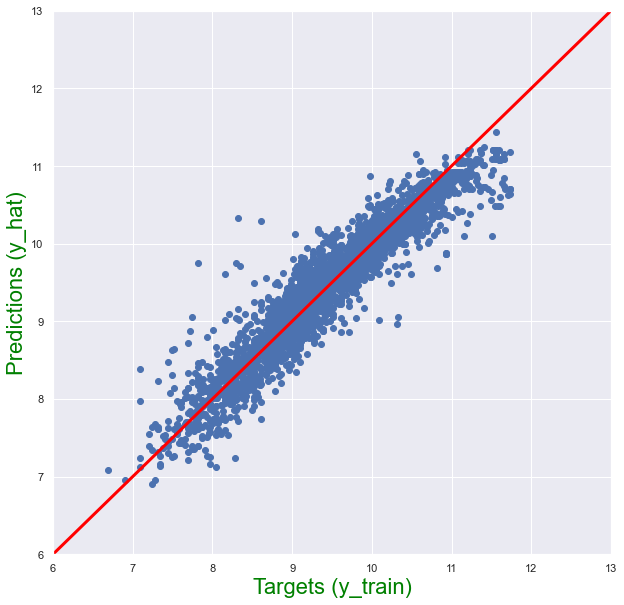

In [53]:
# The simplest way to compare the targets (y_train) and our regression's predictions (y_hat) is to plot them on a scatter plot.
# The closer the points are to the 45-degree line, the better our regression's predictions.
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=22, c="green") # Naming and formatting our axes
plt.ylabel('Predictions (y_hat)',size=22, c="green")

# Note that we want the x-axis and the y-axis to have the exact same scale,
# that's the only way our "45-degree line" method can work and be interpreted correctly...
plt.xlim(6,13)
plt.ylim(6,13)
plt.axline((0,0), slope=1, c="red", linewidth=3) # This is for the 45-degree line through the origin,
                                                 # showing that most of the points are close to the line.
                                                 # This is one of the ways to verify the accuracy of our model.
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

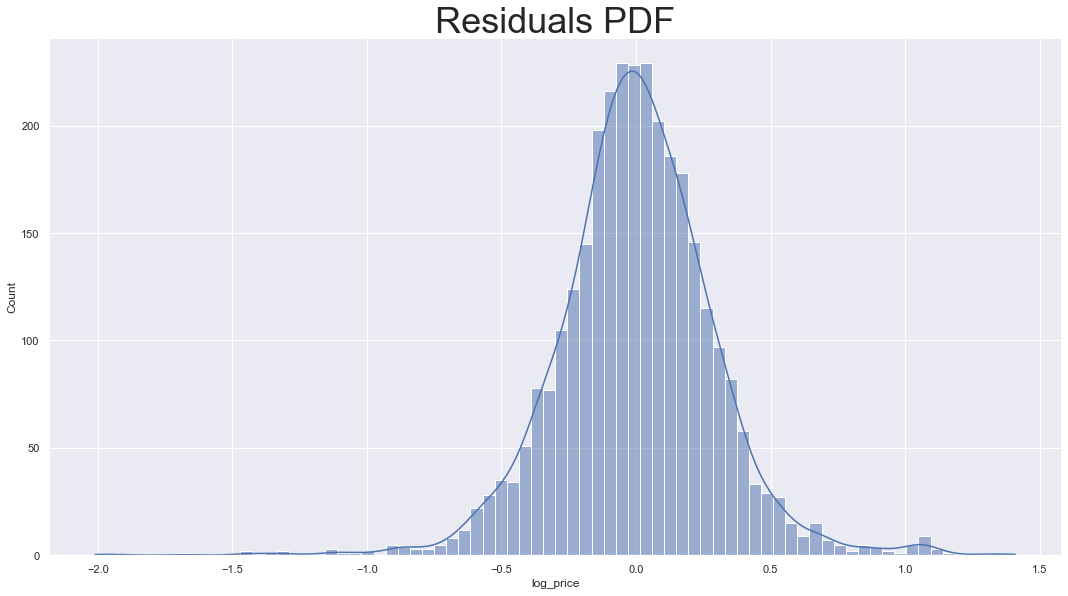

In [54]:
# Another useful check of our model is a residual plot.
# We can plot the PDF of the residuals and check for anomalies.
sns.displot(y_train - y_hat, kde=True, height=8, aspect=15/8)

# The residual is the difference between the actual price of a used car (from our data set): "y_train",
# and the price of that same car: "y_hat (predicted by our model).

plt.title("Residuals PDF", size=36) # PDF plot title

# In the best case scenario, this plot should be normally distributed (which is what we have below).
# In our case, we notice from the Residuals PDF below, that there are more negative residuals than positive ones.
# Given the definition of the residuals (y_train - y_hat), this implies that in more cases,
# y_hat (predictions) are higher than y_train (the targets/actual prices from the data set).
# Perhaps this is some food for thought to improve our model subsequently?

### Finding R-Squared and Adjusted R-Squared of our model to estimate how good our model is.

In [55]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-Squared.
# In other words, we must find the Adjusted R-Squared to have the appropriate measure.

0.8851015858302821

***
#### Find the adjusted R-squared

$ R^{2}_{adj.} = 1 - \frac{\left(1-R^{2}\right)\left(n-1\right)}{n-p-1} $

In [56]:
x_train.shape

(3093, 18)

In [57]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]
r2_adjusted = 1-(((1-r2)*(n-1))/(n-p-1))
r2_adjusted

0.8844287909522551

#### We can see that the Adjusted R-Squared (88.4%) is not significantly different from the R-Squared (88.5%) indicating that our model is quite accurate. Note that Adjusted R-Squared is generally a good indicator of the quality of our model (the higher it is, the better our model is).

***

### Finding the weights and bias

In [58]:
# Let's obtain the bias (intercept) of our regression.
reg.intercept_

9.4175038778787

In [59]:
# Let's also obtain the respective weights (coefficients) of our regression.
# These show us how much each feature contributes to our predictive model.
reg.coef_

array([ 0.49724338, -0.11709593,  0.2235422 ,  0.0241095 , -0.00371108,
       -0.1311494 , -0.21050697, -0.07946041, -0.11014739, -0.09013033,
       -0.07191085, -0.13380848, -0.0863569 , -0.15029964, -0.05235783,
       -0.01738876, -0.0669921 ,  0.25431833])

In [60]:
# The numbers above are barely interpretable so what we will do is create a data frame
# where we match each weight above to its corresponding feature.
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year,0.497243
1,Mileage,-0.117096
2,EngineV,0.223542
3,Brand_BMW,0.024109
4,Brand_Mercedes-Benz,-0.003711
5,Brand_Mitsubishi,-0.131149
6,Brand_Renault,-0.210507
7,Brand_Toyota,-0.079460
8,Brand_Volkswagen,-0.110147
9,Body_hatch,-0.090130


### We can see that "Year" has the biggest weight and therefore the biggest impact on predicting the price of used cars.

### Interpreting weights for categorical features.

In [61]:
# We should remember that when including the categorical variables in our regression by creating dummies,
# we dropped one dummy each for every categorical variable.
# As an example, let's see all the different dummies in the "Brand" variable...

data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### From the above, we can see which Brand dummy was dropped (used as benchmark/reference). It is Audi. An example of how to interpret the Features/Weights summary is that a positive value for the weight of "Brand_BMW" indicates that the BMW brand of cars are more expensive than the Audi (benchmark/reference dummy) brands. We can also infer that registered cars ("Registration_yes") are more expensive than unregistered cars ("Registration_no" - the benchmark/reference dummy). This logic can also be applied to the other categorical variables with respect to their reference dummies.

***

## Testing our model

In [62]:
# After building our model, let us now test it. We will test our model on a dataset that it has not been trained on.
# Remember the Train-Test Split we did earlier? We will now use the test part (20%) of the data to test the accuracy of our model.
# Our test inputs are stored in "x_test", while the outputs are stored in "y_test".
# We must be sure to never train our model on the test data to prevent over-fitting on the data,
# while leaving us with no reliable "fresh" data to test the accuracy of our model on.
# What we need to do is just feed the test input data into our model, find the predictions
# and compare them to their corresponding test outputs.
# If the predictions are far off, then we know our model is inaccurate,
# and we will need to investigate and improve it (based only on the original train data and NOT the test data).

y_hat_test = reg.predict(x_test) # "y_hat_test" will contain the predicted values which we will compare with "y-test".

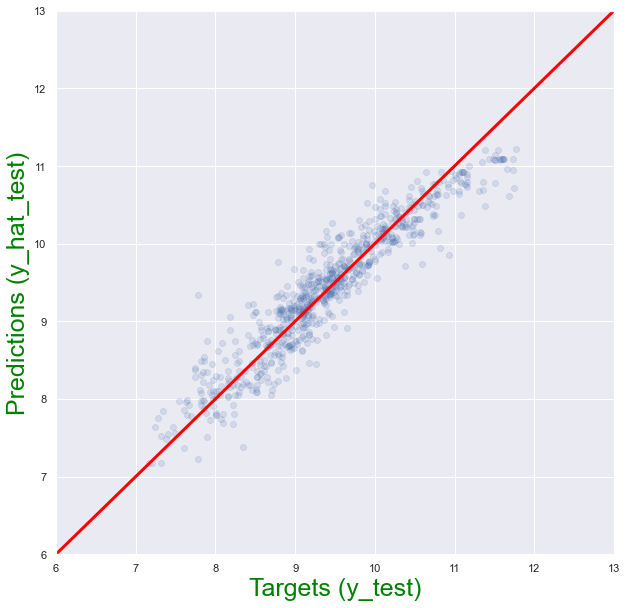

In [63]:
# Let's now create a scatter plot of "y_hat_test" and "y-test".

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_hat_test, alpha=0.15) # The "alpha" argument (which takes values between 0 and 1)
                                            # creates the specified level of opacity of the data points.
                                            # The area with the highest colour saturation indicates
                                            # where most of the data points occur.
                                            # This shows us whether most of the points are close to the line,
                                            # indicating that our model performs well on majority of the test data.
plt.xlabel('Targets (y_test)',size=25, c="green")
plt.ylabel('Predictions (y_hat_test)',size=25, c="green")
plt.xlim(6,13)
plt.ylim(6,13)

plt.axline((0,0), slope=1, c="red", linewidth=3)
plt.show()

### Finally, we will manually check the predicted prices and compare them to the actual (observed) prices to confirm our interpretation of the scatter plot above (which is that our model is considerably accurate).

In [64]:
# Remember we have been working with log of prices from around the beginning of this exercise.
# To obtain the normal prices now, we take the exponential of the log_price
# (exponential is like the opposite of log, it converts the log prices back to "normal" prices).
# We must do this for the predicted test prices and the actual/observed test prices.

normal_prices = pd.DataFrame(np.exp(y_hat_test), columns=["Predicted Test Prices"]) # Predicted normal prices
normal_prices.head()

,Predicted Test Prices
0,5750.934704
1,16984.054354
2,14887.965844
3,11934.789067
4,30101.843903


In [65]:
# We will also find the normal observed test prices and include them in the data frame - "normal_prices",
# so we can manually compare the "Predicted Test Prices" with the "Actual Test Prices".
normal_prices["Actual Test Prices"] = np.exp(y_test)
normal_prices.head()

,Predicted Test Prices,Actual Test Prices
0,5750.934704,NaN
1,16984.054354,NaN
2,14887.965844,NaN
3,11934.789067,NaN
4,30101.843903,NaN


### We can see from the data frame above that we have missing values. This suggests that there is something wrong with the data frame/indexing. We will fix this immediately.

In [66]:
# The reason for the missing values is that we need to reset the indexing of the data frame for y_test
# before converting the log prices back to normal test prices.

y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     8.987197
1     9.825526
2     9.433484
3     9.433484
4    10.252382
Name: log_price, dtype: float64

In [67]:
# Let's now overwrite the "Actual Test Prices" column with the re-indexed y_test,
# while not forgetting to find the exponential of the log prices to obtain the normal prices.
normal_prices["Actual Test Prices"] = np.exp(y_test)
normal_prices

,Predicted Test Prices,Actual Test Prices
0,5750.934704,8000.0
1,16984.054354,18500.0
2,14887.965844,12500.0
3,11934.789067,12500.0
4,30101.843903,28350.0
...,...,...
769,8286.931976,9250.0
770,47479.773588,68000.0
771,19816.391167,14500.0
772,3053.147679,2999.0


### We can see from the data frame above that majority of the prices on either side of the table are quite close. To give a clearer indication of how close, I will add another column to the data frame showing the percentage differences between the predicted and actual test prices.

In [68]:
normal_prices["Difference"] = normal_prices["Actual Test Prices"] - normal_prices["Predicted Test Prices"]

# We are most interested in finding out how close our predictions are to the actual prices,
# not so much whether our predictions are higher or lower than the actual prices.
# Consequently, we will compute the absolute percentage differences.

normal_prices["% Difference"] = np.absolute(normal_prices["Difference"]/normal_prices["Actual Test Prices"]*100)
normal_prices

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
0,5750.934704,8000.0,2249.065296,28.113316
1,16984.054354,18500.0,1515.945646,8.194301
2,14887.965844,12500.0,-2387.965844,19.103727
3,11934.789067,12500.0,565.210933,4.521687
4,30101.843903,28350.0,-1751.843903,6.179344
...,...,...,...,...
769,8286.931976,9250.0,963.068024,10.411546
770,47479.773588,68000.0,20520.226412,30.176804
771,19816.391167,14500.0,-5316.391167,36.664767
772,3053.147679,2999.0,-54.147679,1.805524


### For additional insights into our test, let us get the descriptive statistics for the "normal_prices" data frame.

In [69]:
normal_prices.describe()

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
count,774.000000,774.000000,774.000000,774.000000
mean,17112.874016,18760.514057,1647.640041,24.335610
std,14423.424576,21180.943219,9990.013131,25.906378
min,1299.804252,1300.000000,-25673.178714,0.017029
25%,6988.420317,6999.000000,-1912.375629,8.582269
50%,12387.033161,11700.000000,-103.910049,18.034061
75%,22778.416394,21950.000000,1892.551761,31.289492
max,74147.741288,129222.000000,81139.975170,374.213789


### A few great insights we can obtain from the table above (which summarises our model's performance):

##### 1. The average percentage difference between the actual prices of the cars in our test data and the corresponding prices predicted by our model is 24.3%.

##### 2. For 75% of the cars in our test data, the percentage difference between actual and predicted prices does not exceed 31.3%.

### Extra:
##### Let us display all rows of our test results, then round the results to 2 decimal places and sort the values in ascending order according to the percentage price difference.

In [70]:
# It can be useful to check all our results manually so we will use the relevant pandas syntax:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

normal_prices.sort_values(by=["% Difference"])

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
246,9501.62,9500.00,-1.62,0.02
121,14247.57,14250.00,2.43,0.02
362,6897.20,6900.00,2.80,0.04
310,5803.94,5800.00,-3.94,0.07
751,10999.42,10990.00,-9.42,0.09
199,15696.87,15672.15,-24.72,0.16
468,11719.39,11700.00,-19.39,0.17
229,13876.69,13900.00,23.31,0.17
475,6010.82,6000.00,-10.82,0.18
614,13527.19,13499.00,-28.19,0.21
